In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten , Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [20]:
train_dir = r"C:\Users\niles\Downloads\Pneumonia X Ray-20221031T100017Z-001\Pneumonia X Ray\train"
test_dir = r"C:\Users\niles\Downloads\Pneumonia X Ray-20221031T100017Z-001\Pneumonia X Ray\test"

In [21]:
train_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_dir,target_size = (150,150),batch_size = 32,class_mode = 'binary')

Found 3937 images belonging to 2 classes.


In [22]:
test_gen = ImageDataGenerator(rescale = 1./255).flow_from_directory(
    test_dir,target_size=(150,150),batch_size = 32,class_mode = 'binary'
)

Found 624 images belonging to 2 classes.


In [23]:
class_names = list(train_gen.class_indices.keys())
print("classes : ",class_names)

classes :  ['NORMAL', 'PNEUMONIA']


In [24]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
    


    
])

In [25]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [26]:
history = model.fit(train_gen,validation_data = test_gen,epochs = 5,verbose = 1)

Epoch 1/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.8501 - loss: 0.4067 - val_accuracy: 0.8606 - val_loss: 0.3109
Epoch 2/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 105s 845ms/step - accuracy: 0.9380 - loss: 0.1728 - val_accuracy: 0.8157 - val_loss: 0.4896
Epoch 3/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 122s 981ms/step - accuracy: 0.9713 - loss: 0.0889 - val_accuracy: 0.8301 - val_loss: 0.4513
Epoch 4/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - accuracy: 0.9759 - loss: 0.0681 - val_accuracy: 0.7612 - val_loss: 1.1069
Epoch 5/5
124/124 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.9761 - loss: 0.0677 - val_accuracy: 0.7484 - val_loss: 1.0285


In [27]:
x_test,y_test = next(test_gen)
preds = (model.predict(x_test[:5]) > 0.5).astype(int).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


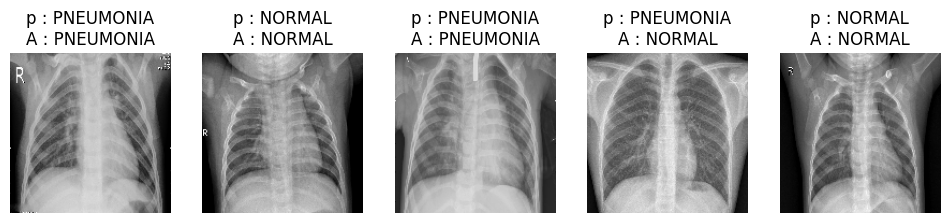

In [28]:
plt.figure(figsize = (12,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"p : {class_names[preds[i]]}\nA : {class_names[int(y_test[i])]}")
    plt.axis('off')

plt.show()